# What Happens in a Day

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [17]:
nyc_data = pd.read_csv("/data/bikeshare/data/unified/nyc.csv")
boston_data = pd.read_csv("/data/bikeshare/data/unified/boston.csv")
main_data = pd.read_csv("/data/bikeshare/data/unified/merged.csv")

In [18]:
nyc = {'name':'New York City', 'data':nyc_data, 'ref':'nyc'}
boston = {'name':'Boston', 'data':boston_data, 'ref':'bos'}
main = {'name':'All Data', 'data':main_data, 'ref':'all'}

## Riders by Hour of Day

In [7]:
def riders_by_hour(data):
    n = 10000
    sample = data['data'].sample(n)
    times = pd.DatetimeIndex(pd.to_datetime(sample.start_time))
    d = sample.groupby([times.hour]).duration.count()
    plt.bar(d.index, d/n)
    axes = plt.gca()
    plt.xlabel("Hour of Day")
    plt.ylabel("Percentage")
    axes.set_xlim([0,23])
    plt.title("Count of Bikeshare Riders in {}".format(data['name']))
    plt.savefig('../images/2/riders_by_hour_'+data['ref']+'.png')
    plt.show()

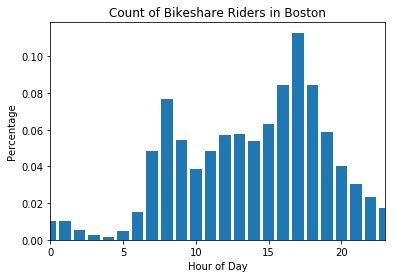

In [8]:
riders_by_hour(boston)

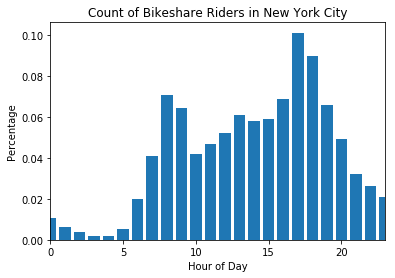

In [9]:
riders_by_hour(nyc)

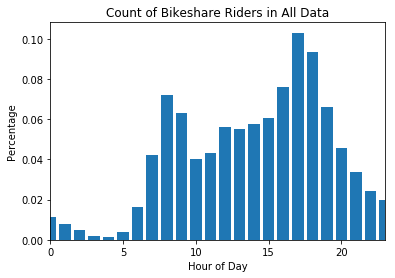

In [10]:
riders_by_hour(main)

## Riders by Day of Month

In [11]:
def riders_by_day(data):
    n = data['data'].shape[0]
    sample = data['data'].sample(n)
    times = pd.DatetimeIndex(pd.to_datetime(sample.start_time))
    d = sample.groupby([times.day]).duration.count()
    plt.bar(d.index, d)
    axes = plt.gca()
    plt.xlabel("Day of Month")
    plt.ylabel("Percentage")
    axes.set_xlim([0,23])
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.savefig('../images/2/riders_by_month_'+data['ref']+'.png')
    plt.show()
    

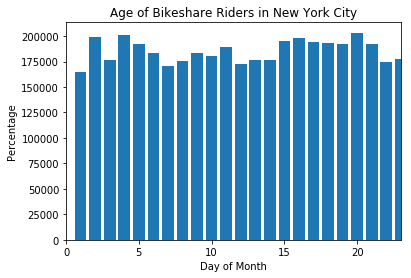

In [12]:
riders_by_day(nyc)

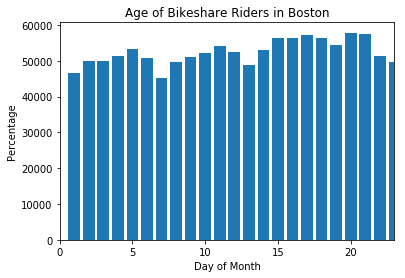

In [13]:
riders_by_day(boston)

## Riders by Day of Week

In [14]:
def riders_by_weekday(data):
    n = data['data'].shape[0]
#     n = 10000
    sample = data['data'].sample(n)
    times = pd.DatetimeIndex(pd.to_datetime(sample.start_time))
    d = sample.groupby([times.dayofweek]).duration.count()
    plt.bar(d.index, d)
    axes = plt.gca()
    plt.xlabel("Day of Week")
    plt.ylabel("Percentage")
    axes.set_xlim([0,6])
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.savefig('../images/2/riders_by_weekday_'+data['ref']+'.png')
    plt.show()

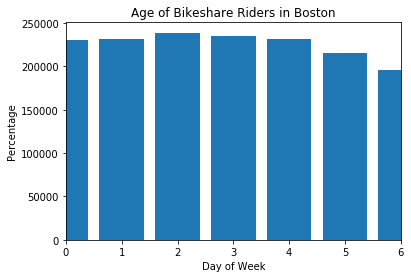

In [15]:
riders_by_weekday(boston)

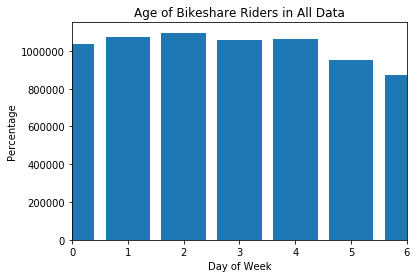

In [16]:
riders_by_weekday(main)